# Project 1: Digit Classification with KNN and Naive Bayes

In this project, I implement my own image recognition system for classifying digits. Parts of the notebook are provided as a template given this was initially done in the context of an assignment for my Applied Machine Learning class. **Code written specifically by me is contained in the functions P1 through P11.**

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that is used in many of the below examples

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python useful info:

- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

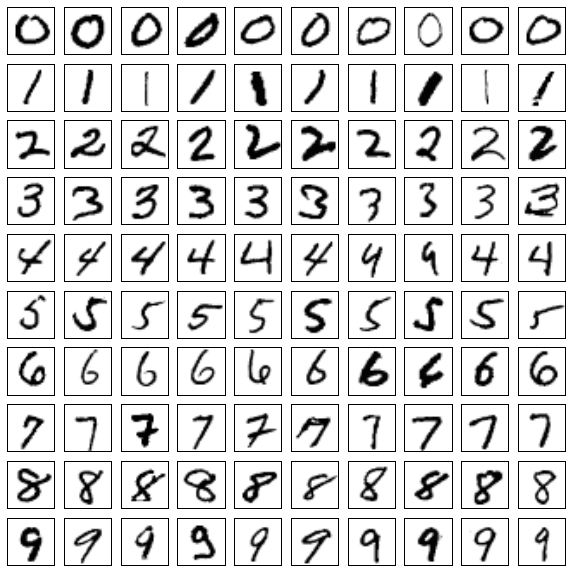

In [3]:
def P1(num_examples=10):

    # Createa 10x10 figure to display the results
    plt.figure(figsize=(num_examples, num_examples))
    labels = np.unique(mini_train_labels)
    subplot = 1
    for i in labels:
        for j in np.where(mini_train_labels == i)[0][:10]:
            plt.subplot(len(labels), num_examples, subplot)
            # Reshape the array into a matrix for rendering
            matrix = np.reshape(mini_train_data[j], (28, 28))
            # Render the matrix in greys
            plt.imshow(matrix, cmap='Greys')
            # Remove the x and y scales
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            subplot += 1

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set, showing precision, recall, and F1 for each label

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

    for k in k_values:
        # Create KN models based on the different k values
        knn_P2 = KNeighborsClassifier(k)
        # Fit the model to the mini training set
        knn_P2.fit(mini_train_data, mini_train_labels)
        # Run prediction on the dev data
        predicted_P2 = knn_P2.predict(dev_data)
        expected_P2 = dev_labels
        print("Classification report for classifier %s:\n%s\n"
              % (knn_P2, classification_report(expected_P2, predicted_P2)))    

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neigh

Based on the above results, we see that digit 9 is often the most difficult to predict

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value that can be used for timing operations

In [5]:
def P3(train_sizes, accuracies):

    times = []
    for size in train_sizes:
        # Run KNN(n=1) models for different training data sizes from train_sizes
        knn_P3 = KNeighborsClassifier(1)
        train_data_P3, train_labels_P3 = X[:size], Y[:size]
        knn_P3.fit(train_data_P3, train_labels_P3)
        # Get a timestamp after fitting the data and before doing the prediction
        pre_time = time.time()
        knn_P3.predict(dev_data)
        # Get a timestamp after the prediction
        post_time = time.time()
        total_time = post_time - pre_time
        # Calculate accuracy and append to accuracies list along with time to times list
        accuracy = knn_P3.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        times.append(total_time)
    
    # After looping through all the models, print the training size list, the accuracy list, and the times list.
    fmt = '{:<8}{:<15}{:<10}{}'

    print(fmt.format('', 'Training Size', 'Accuracy', 'Time (s)'))
    for i, (size, accuracy, t) in enumerate(zip(train_sizes, accuracies, times)):
        print(fmt.format(i, size, accuracy, t))


train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

        Training Size  Accuracy  Time (s)
0       100            0.72      0.313280105591
1       200            0.786     0.279146909714
2       400            0.841     0.565783023834
3       800            0.884     1.17053794861
4       1600           0.902     2.51250505447
5       3200           0.926     5.09003090858
6       6400           0.937     10.1629619598
7       12800          0.959     20.454408884
8       25000          0.97      44.8864970207


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:
def P4():

    lm_P4 = LinearRegression()
    train_sizes_P4 = np.reshape(train_sizes, (-1,1))
    lm_P4.fit(train_sizes_P4, accuracies)
    print "Linear regression prediction for n=60000 based on train_sizes: " + str(lm_P4.predict(60000))
    
    log_train_sizes_P4 = np.log(train_sizes_P4)
    lm_P4.fit(log_train_sizes_P4, accuracies)
    print "Linear regression prediction for n=60000 based on log of train_sizes: " + str(lm_P4.predict(np.log(60000)))

P4()

Linear regression prediction for n=60000 based on train_sizes: [ 1.24307226]
Linear regression prediction for n=60000 based on log of train_sizes: [ 1.03386514]


ANSWER: The problem with regression is that we do not have a linear relationship between the training size and the accuracy. At most, the accuracy will be equal to 1 so the more we increase the training size, the more the data will converge towards 1. By applying a log transform, we make our prediction more reasonable.

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


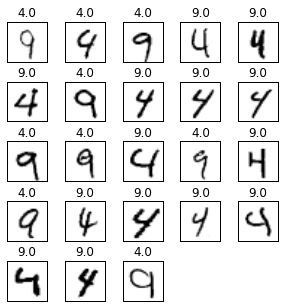

In [8]:
def P5():

    # Create a 1-NN model and fit it with the trainining data
    knn_P5 = KNeighborsClassifier(1)
    knn_P5.fit(mini_train_data, mini_train_labels)
    
    # Create a prediction from the dev data and output a confusion matrix
    predicted_P5 = knn_P5.predict(dev_data)
    cm_P5 = confusion_matrix(dev_labels, predicted_P5)
    
    print cm_P5
    
    # Let's print some results for 4s and 9s
    plt.figure(figsize=(5, 5))
    plt.subplots_adjust(hspace=0.5)
    k = 1
    for i in range(len(dev_labels)):
        if (dev_labels[i]==4 and predicted_P5[i] == 9) or (dev_labels[i]==9 and predicted_P5[i] == 4):
            plt.subplot(5, 5, k)
            # Reshape the array into a matrix for rendering
            matrix = np.reshape(X[60000+i], (28, 28))
            # Render the matrix in greys
            plt.imshow(matrix, cmap='Greys')
            # Remove the x and y scales
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            # Add as a title the actual prediction so we know
            plt.title(str(predicted_P5[i]))
            k += 1
    
P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

For blurred training data and regular development data, the score is: 0.896
For regular training data and blurred development data, the score is: 0.86
For blurred training data and blurred development data, the score is: 0.902


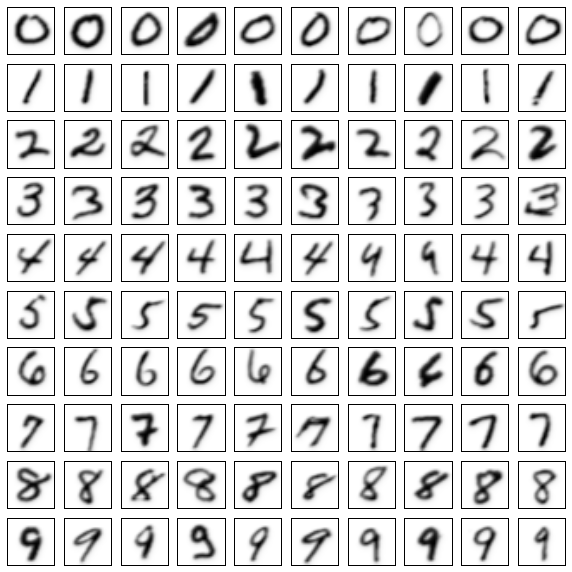

In [11]:
# This function will assume a 784 (28x28) digit
def GaussianBlur28(data):
    for k in range(len(data)):
        point = data[k]
        # We will create a new point so that we can modify the value and not the reference
        new_point = np.array(point)
        shaped_point = new_point.reshape(28, 28)
        for i in range(28):
            for j in range(28):                
                # We will use the calculations below to determine the coordinates of the neighboring pixels
                Ia = 0 if i-1<0 else i-1
                Ib = 28 if i+2>28 else i+2
                Ja = 0 if j-1<0 else j-1
                Jb = 28 if j+2>28 else j+2
                
                # Grab a 3x3 piece of the point in order to get the center
                piece = shaped_point[Ia:Ib, Ja:Jb]
                piece_size = len(piece) * len(piece[0])
                piece_sum = sum(map(sum, piece))
                
                # Set the new value for the pixel 
                shaped_point[i,j] = piece_sum/piece_size
        data[k] = shaped_point.ravel()

def P6():
    
    # Make new copies of the data so we can modify them freely
    blur_mini_train_data = [np.array(row) for row in mini_train_data]
    blur_dev_data = [np.array(row) for row in dev_data]
    
    # Blur procedure for mini_train_data and dev data
    GaussianBlur28(blur_mini_train_data)
    GaussianBlur28(blur_dev_data)

    # Create a 1-NN to use for the different combinations mentioned in the question
    knn_P6 = KNeighborsClassifier(1)    
    knn_P6.fit(blur_mini_train_data, mini_train_labels)
    score1 = knn_P6.score(dev_data, dev_labels)
    print "For blurred training data and regular development data, the score is: %s" % score1
    
    knn_P6 = KNeighborsClassifier(1)
    knn_P6.fit(mini_train_data, mini_train_labels)
    score2 = knn_P6.score(blur_dev_data, dev_labels)
    print "For regular training data and blurred development data, the score is: %s" % score2
    
    knn_P6 = KNeighborsClassifier(1)
    knn_P6.fit(blur_mini_train_data, mini_train_labels)
    score3 = knn_P6.score(blur_dev_data, dev_labels)
    print "For blurred training data and blurred development data, the score is: %s" % score3
    
    # Createa 10x10 figure to display some blurred results
    plt.figure(figsize=(10, 10))
    subplot = 1
    for i in range(10):
        for j in np.where(mini_train_labels == i)[0][:10]:
            plt.subplot(10, 10, subplot)
            # Reshape the array into a matrix for rendering
            matrix = np.reshape(blur_mini_train_data[j], (-1, 28))
            # Render the matrix in greys
            plt.imshow(matrix, cmap='Greys')
            # Remove the x and y scales
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            subplot += 1

P6()

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [12]:
def P7():

    binarized_mini_train_data = [np.array(row) for row in mini_train_data]
    multi_mini_train_data = [np.array(row) for row in mini_train_data]
    
    for i in range(len(mini_train_data)):
        for j in range(len(mini_train_data[0])):
            # For the binarized data, we will use 0.5 as a threshold since it's halfway between 0 and 1
            if binarized_mini_train_data[i][j] > 0.5:
                binarized_mini_train_data[i][j] = 1
            else:
                binarized_mini_train_data[i][j] = 0
            
            # Similarly for the multinomial scenarion, we will use 0.33 and 0.66 as thresholds
            if multi_mini_train_data[i][j] > 0.66:
                multi_mini_train_data[i][j] = 2
            elif multi_mini_train_data[i][j] <= 0.66 and multi_mini_train_data[i][j] > 0.33:
                multi_mini_train_data[i][j] = 1
            else:
                multi_mini_train_data[i][j] = 0
                
    bnb = BernoulliNB()
    bnb.fit(binarized_mini_train_data, mini_train_labels)
    print 'Bernoulli accuracy: %3.2f' % bnb.score(dev_data, dev_labels)
            
    
    mnb = MultinomialNB()
    mnb.fit(multi_mini_train_data, mini_train_labels)
    print 'Multinomial accuracy: %3.2f' % mnb.score(dev_data, dev_labels)
    

P7()

Bernoulli accuracy: 0.80
Multinomial accuracy: 0.80


ANSWER: The multi-class version very slighlty improves the result. This is likely due to a few fringe cases that could be intepreted one way or another. For example, there can be confusion between 4s and 9s and by fully shading digits in black and white only (binarizing), we might change the result.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [13]:
def P8(alphas):

    bnb = BernoulliNB()  
    gscv = GridSearchCV(bnb, alphas)
    gscv.fit(mini_train_data, mini_train_labels)
    
    print "Grid scores: %s" % gscv.grid_scores_
    print "\nBest score is: %s for alpha: %s" % (gscv.best_score_, gscv.best_estimator_.alpha)

    return gscv

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

Grid scores: [mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}, mean: 0.82000, std: 0.02208, params: {'alpha': 0.0001}, mean: 0.82000, std: 0.02305, params: {'alpha': 0.001}, mean: 0.82000, std: 0.02607, params: {'alpha': 0.01}, mean: 0.82100, std: 0.02454, params: {'alpha': 0.1}, mean: 0.81900, std: 0.02147, params: {'alpha': 0.5}, mean: 0.81200, std: 0.01814, params: {'alpha': 1.0}, mean: 0.81000, std: 0.01767, params: {'alpha': 2.0}, mean: 0.77500, std: 0.01719, params: {'alpha': 10.0}]

Best score is: 0.821 for alpha: 0.1


/home/hdanish/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
/home/hdanish/anaconda/lib/python2.7/site-packages/sklearn/naive_bayes.py:785: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


In [246]:
print nb.best_params_

{'alpha': 0.01}


ANSWER: The best value for alpha is 0.01. The accuracy for alpha=0 is very low, at 0.11600. This is to be expected because if we actively specify that we want 0 smoothing then this will negatively impact the NB process and create a mess of the values and predictions/scores.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [14]:
def P9():

    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    print "Score: %s" % gnb.score(dev_data, dev_labels)
    #print "Theta: %s" % gnb.theta_
    #print "Sigma: %s" % gnb.sigma_
    
    gnb.sigma_ += 0.02
    print "Score: %s" % gnb.score(dev_data, dev_labels)
    #print "Theta: %s" % gnb.theta_
    #print "Sigma: %s" % gnb.sigma_
    
    return gnb

gnb = P9()

Score: 0.621
Score: 0.79


ANSWER: By changing the sigma parameter, we are changing the variance associated with the classifier, and in doing so we are giving it more flexibility that we do not have otherwise. After some trial and error for different values, I ended up on 0.02 as a good increment in order to achieve a better score.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

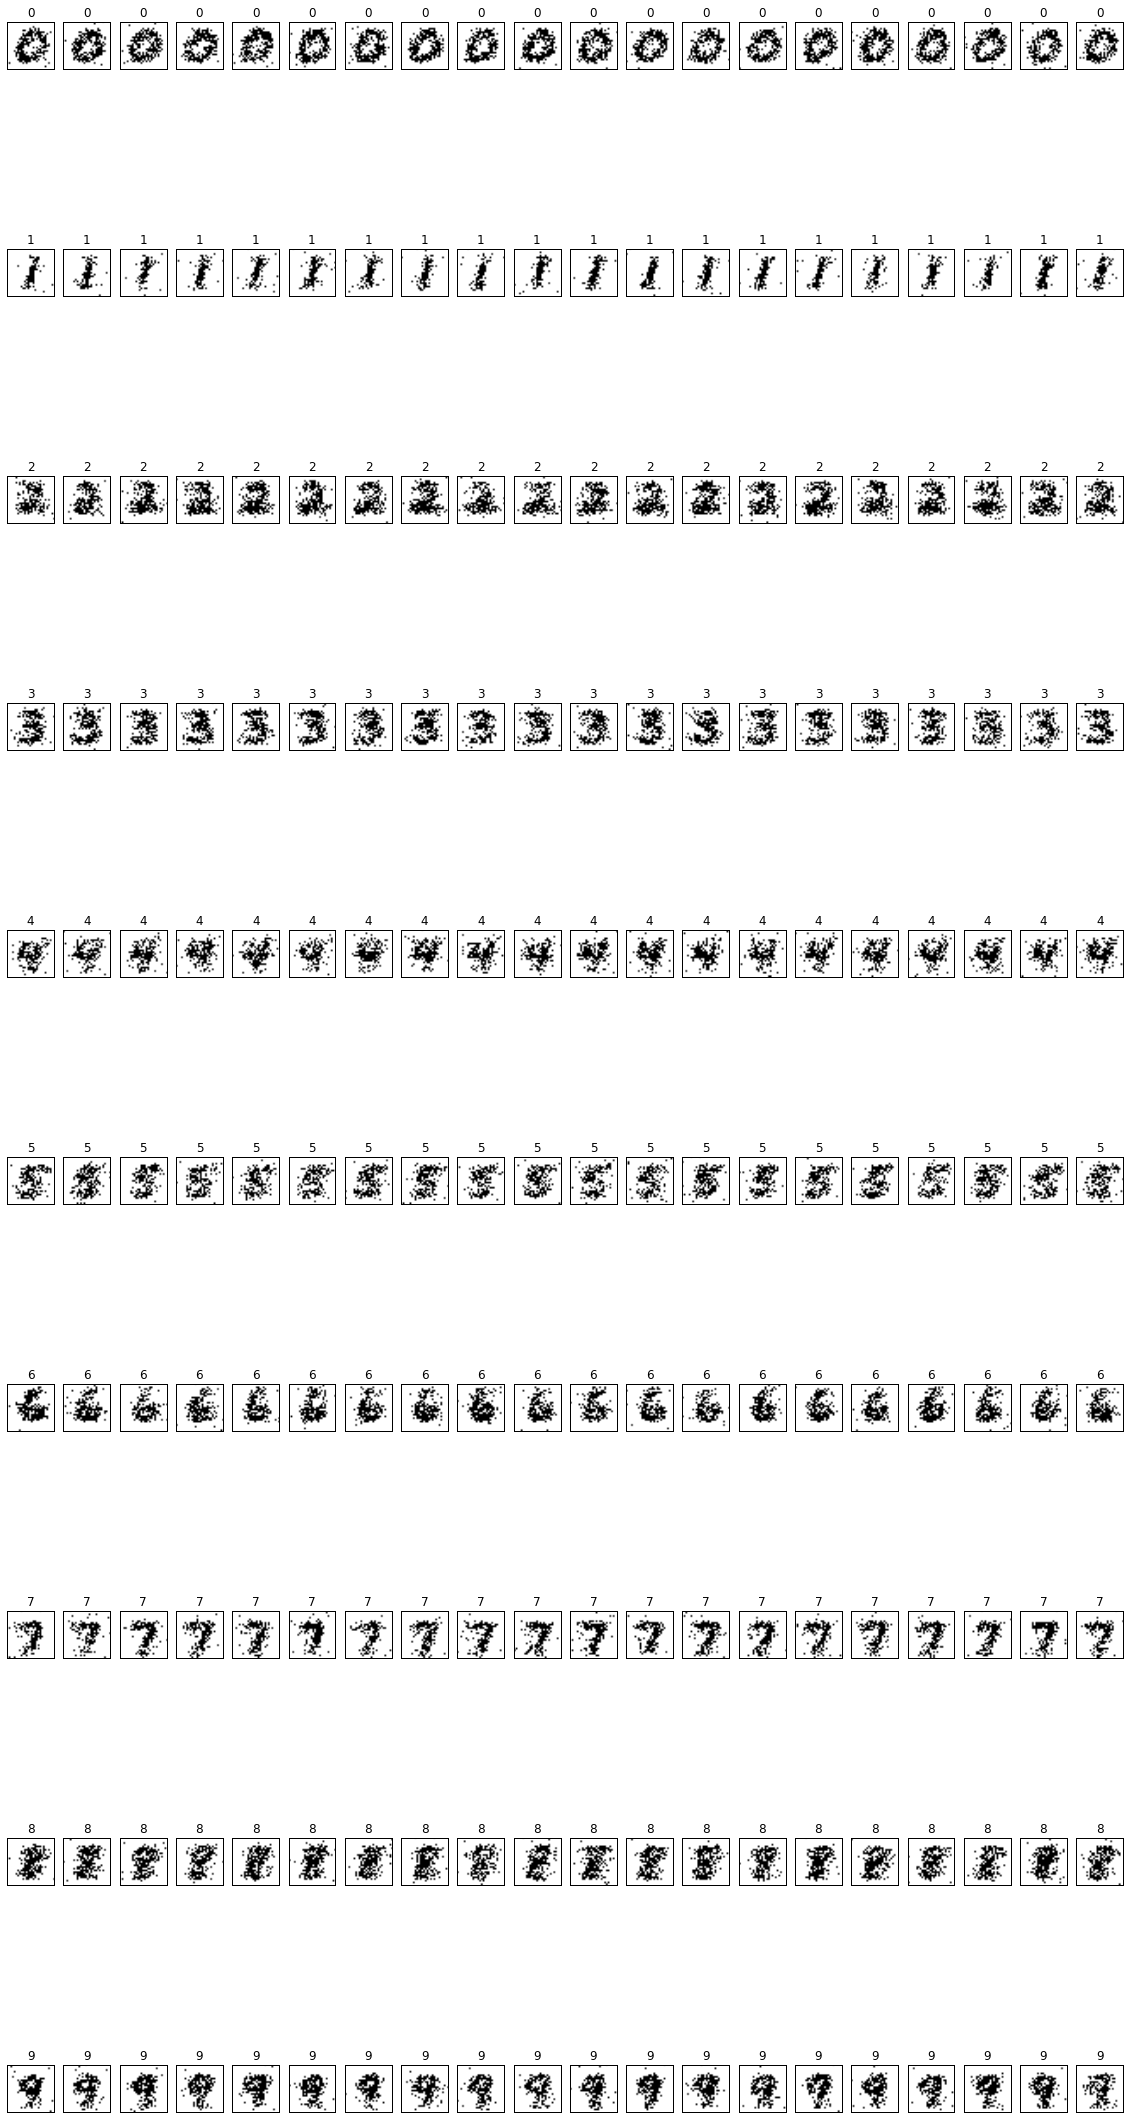

In [15]:
def P10(num_examples):

    plt.figure(figsize=(20, 40))
    bnb = BernoulliNB()
    bnb.fit(mini_train_data, mini_train_labels)
    for i in range(10):
        for n in range(num_examples):
            prob = np.exp(bnb.feature_log_prob_[i])
            rand = np.random.rand(784)
            unif = prob > rand
            plt.subplot(10, 20, i*20+n+1)
            # Reshape the array into a matrix for rendering
            matrix = np.reshape(unif, (-1, 28))
            # Render the matrix in greys
            plt.imshow(matrix, cmap='Greys')
            # Remove the x and y scales
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            plt.title(i)


P10(20)

ANSWER: The generated digits are not nearly as crisp and defined as the originals. It could be said that they look a little noisy. With that said, this is likely due to the binary nature of our digit generation. We are only considering individual pixels and with the random generation we may be getting more or less pixels to be fully black than we want to. We would likely want some grey features and some pixels should likely be the opposite of what they are. For example, the bottom right corner of the last 9 has a few dots that we wouldn't really want.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [17]:
def P11(buckets, correct, total):
    
    # First we train our Bernoulli model
    bnb = BernoulliNB(alpha=0.01)
    bnb.fit(mini_train_data, mini_train_labels)
    
    # Using the dev data, we will go through all the results
    for i in range(len(dev_data)):
        # We get the posterior probability for all cases of a given point in the dev data
        probs = bnb.predict_proba(dev_data[i].reshape(1, -1))
        # Then we get the max probability from these as well as its index (label)
        max_prob = max(probs[0])
        max_index = np.argmax(probs[0])
        # Then we compare through the buckets we have from the params
        for index, bucket in enumerate(buckets):
            # We want to check for mutual exclusivity of the buckets
            if (index!=len(buckets)-1 and max_prob >= buckets[index] and max_prob < buckets[index+1]) or (index==len(buckets)-1 and max_prob >= buckets[index]):
                # If we're a match for a bucket, increment its total
                total[index] += float(1)
                # If we're also a match for the true dev label, then increment the correct as well
                if max_index == int(dev_labels[i]):
                    correct[index] += float(1)
                    
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    correct = %3d    accuracy = %.3f' %(buckets[i], total[i], correct[i], accuracy)

p(pred) <= 0.5000000000000    total =  30    correct =  12    accuracy = 0.400
p(pred) <= 0.9000000000000    total =  76    correct =  34    accuracy = 0.447
p(pred) <= 0.9990000000000    total =  51    correct =  25    accuracy = 0.490
p(pred) <= 0.9999900000000    total =  62    correct =  36    accuracy = 0.581
p(pred) <= 0.9999999000000    total =  44    correct =  26    accuracy = 0.591
p(pred) <= 0.9999999990000    total =  47    correct =  37    accuracy = 0.787
p(pred) <= 0.9999999999900    total =  39    correct =  30    accuracy = 0.769
p(pred) <= 0.9999999999999    total =  25    correct =  19    accuracy = 0.760
p(pred) <= 1.0000000000000    total = 625    correct = 597    accuracy = 0.955


ANSWER: I would say that the higher the level of calibration, the higher the accuracy of model. There are some exeptions in the data above but the buckets other than the 1.0 do not have sufficient values. However, the pattern is that the accuracy increases with the calibration.